In [1]:
# load data; visualize data; generate new data
# establish model and train; predict
# accuracy
# decision boundary
# define f(x) to solve the boundary

In [2]:
# load data
import pandas as pd
import numpy as np
data = pd.read_csv('chip_test.csv')
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


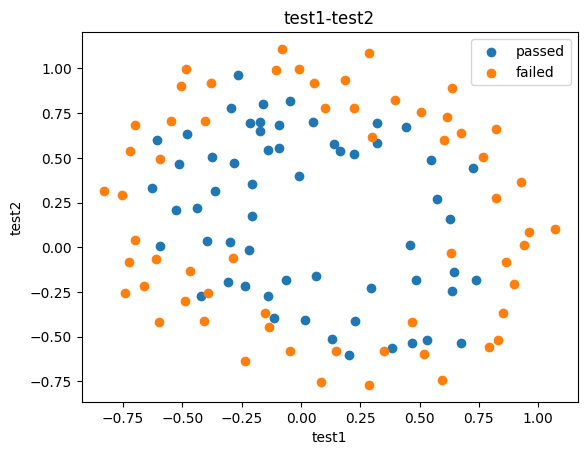

In [3]:
# visualize the data 
%matplotlib inline
from matplotlib import pyplot as plt

mask = data.loc[:,'pass'] == 1
fig1 = plt.figure()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:, 'test2'][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:, 'test2'][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [4]:
# define x, y
x = data.drop(['pass'], axis=1)
y = data.loc[:, 'pass']
x1 = data.loc[:, 'test1']
x2 = data.loc[:, 'test2']

x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2

x_new = {'x1':x1, 'x2':x2, 'x1_2':x1_2, 'x2_2':x2_2, 'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)


           x1        x2      x1_2      x2_2     x1_x2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_new,y)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score
y_predict = lr.predict(x_new)
accuracy = accuracy_score(y, y_predict);
print(accuracy)

0.8135593220338984


C:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


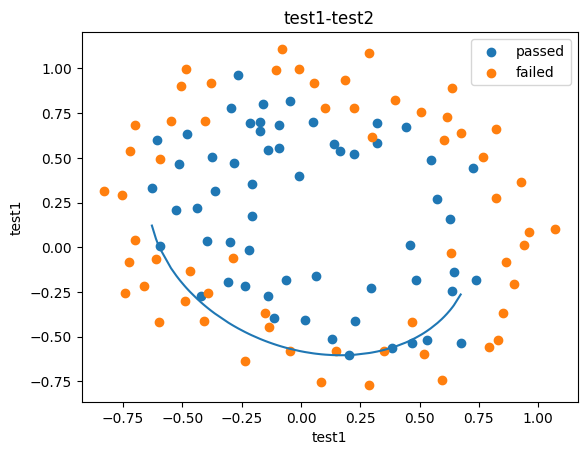

In [7]:
x1_new = x1.sort_values()
theta0 = lr.intercept_
theta1,theta2,theta3,theta4,theta5 = lr.coef_[0][0],lr.coef_[0][1],lr.coef_[0][2],lr.coef_[0][3],lr.coef_[0][4]

a = theta4
b = theta5 * x1_new + theta2
c = theta0 + theta1 * x1_new + theta3 * x1_new * x1_new
x2_new_boundary = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
fig2 = plt.figure()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:, 'test2'][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:, 'test2'][~mask])
plt.plot(x1_new, x2_new_boundary)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test1')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [8]:
# define f(x)
def f(x):
    a = theta4
    b = theta5 * x + theta2
    c = theta0 + theta1 * x + theta3 * x * x
    x2_new_boundary1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
    x2_new_boundary2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)    
    return x2_new_boundary1, x2_new_boundary2

In [9]:
x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_new:
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
print(x2_new_boundary1, x2_new_boundary2)

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([0.12118557]), array([0.046756]), array([0.02694692]), array([0.00869419]), array([-0.00832964]), array([-0.00832964]), array([-0.11719503]), array([-0.16040596]), array([-0.18016739]), array([-0.18965406]), array([-0.21670972]), array([-0.22529994]), array([-0.23369318]), array([-0.24992385]), array([-0.28761169]), array([-0.30846342]), array([-0.32171357]), array([-0.32815515]), array([-0.3344791]), array([-0.34068868]), array([-0.35277682]), array([-0.35866103]), array([-0.37012269]), array([-0.42185219]), array([-0.42655662]), array([-0.43118989]), array([-0.43573725]), array([-0.44020804]), array([-0.45317261]), array([-0.4733505]), array([-0.4733505]), array([-0.48464004]), array([-0.48827191]), array([-0.49183935]), array([-0.49183935]), array([-0.51192772]), array([-0.51192772]), array([-0.51813664]), array([-0.52410902]), array([-0.52985346]), array([-0.529853

C:\Users\WindW\AppData\Local\Temp\ipykernel_36820\580793585.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
C:\Users\WindW\AppData\Local\Temp\ipykernel_36820\580793585.py:7: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)


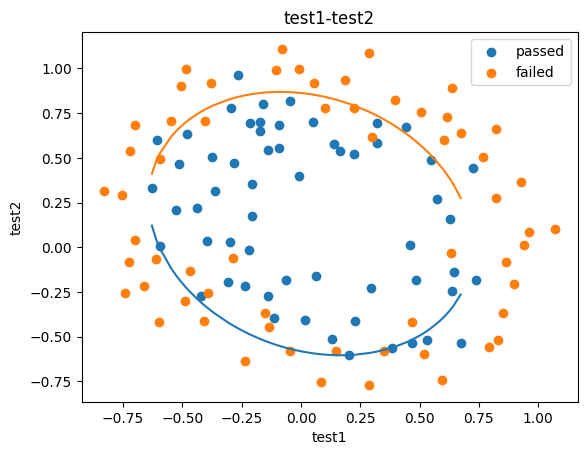

In [10]:
fig3 = plt.figure()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:, 'test2'][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:, 'test2'][~mask])
plt.plot(x1_new, x2_new_boundary1)
plt.plot(x1_new, x2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [11]:
x1_range = [-0.9 + x/10000 for x in range(0, 19000)]
x1_range = np.array(x1_range)

x2_new_boundary1 = []
x2_new_boundary2 = []
for x in x1_range:
    x2_new_boundary1.append(f(x)[0])
    x2_new_boundary2.append(f(x)[1])
print(x2_new_boundary1, x2_new_boundary2)

C:\Users\WindW\AppData\Local\Temp\ipykernel_36820\580793585.py:6: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
C:\Users\WindW\AppData\Local\Temp\ipykernel_36820\580793585.py:7: RuntimeWarning: invalid value encountered in sqrt
  x2_new_boundary2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)


[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array

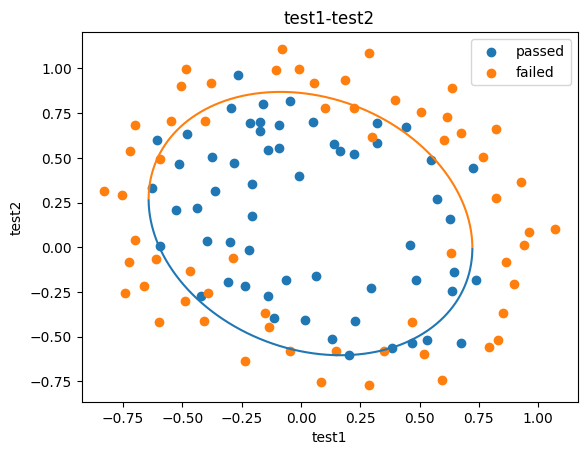

In [12]:
fig4 = plt.figure()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:, 'test2'][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:, 'test2'][~mask])
plt.plot(x1_range, x2_new_boundary1)
plt.plot(x1_range, x2_new_boundary2)
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()